<a href="https://colab.research.google.com/github/Peter-TMK/Peter-TMK-data-science-nigeria-insurance-claims-competition/blob/main/Kaggle_DSN_SUBM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,2013-11-11,OH,250/500,1000,6303 1st Drive,22,1,?,0,1325.44,7000000,474898,2015-02-18,Parked Car,?,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,492224,2005-12-09,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,608767,2015-02-19,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,2001-11-29,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,467227,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,355085,2012-10-09,IN,500/1000,500,6117 4th Ave,21,1,?,0,1021.90,0,464237,2015-02-05,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,2004-01-02,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,439870,2015-01-03,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [ ]:
test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,924318,2014-07-27,IL,250/500,2000,3706 Texas Hwy,22,1,YES,1,1137.02,0,468872,2015-01-25,Single Vehicle Collision,Rear Collision,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,180286,2009-02-08,IL,500/1000,1000,1989 Solo Lane,17,3,?,2,1422.78,0,616583,2015-01-20,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,178081,1990-07-20,IN,250/500,1000,1422 Flute Ave,14,3,?,1,976.37,0,602842,2015-02-18,Multi-vehicle Collision,Rear Collision,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,991480,1992-12-09,IN,100/300,2000,9734 2nd Ridge,10,3,NO,0,1373.21,0,478486,2015-02-14,Multi-vehicle Collision,Front Collision,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,630998,2003-04-09,OH,250/500,1000,3693 Pine Ave,6,1,YES,2,1117.17,0,473645,2015-02-12,Parked Car,?,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


## Checking for Null values and Data Types

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

## Checking for Data Statistics

In [ ]:
train.describe()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39,total_claim_amount
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.000000,0.0,700.000000
mean,209.528571,39.417143,25777.571429,-27061.000000,551898.977143,1142.142857,11.747143,1.827143,1.001429,1256.950357,1.092857e+06,500211.260000,1.442857,2004.984286,NaN,71900.933214
std,114.746174,9.170472,28239.300780,27874.242557,260076.772911,617.005999,6.987445,1.014970,0.819119,249.616802,2.289793e+06,71731.677629,1.132631,6.013198,NaN,34915.974923
min,0.000000,19.000000,0.000000,-111100.000000,100804.000000,500.000000,0.000000,1.000000,0.000000,433.330000,0.000000e+00,430104.000000,0.000000,1995.000000,NaN,133.330000
25%,123.000000,32.000000,0.000000,-51825.000000,337547.250000,500.000000,6.000000,1.000000,0.000000,1084.702500,0.000000e+00,446952.000000,0.000000,2000.000000,NaN,58933.330000
50%,209.000000,39.000000,5000.000000,-27450.000000,547773.000000,1000.000000,12.000000,1.000000,1.000000,1256.340000,0.000000e+00,465565.000000,1.000000,2005.000000,NaN,77733.330000
75%,283.000000,45.000000,52200.000000,0.000000,775554.500000,2000.000000,17.250000,3.000000,2.000000,1423.890000,0.000000e+00,603417.500000,2.000000,2010.000000,NaN,95503.332500
max,479.000000,64.000000,98800.000000,0.000000,998865.000000,2000.000000,23.000000,4.000000,2.000000,2047.590000,1.000000e+07,620869.000000,3.000000,2015.000000,NaN,153226.670000


In [ ]:
train.shape

(700, 37)

In [ ]:
test.shape

(300, 36)

In [ ]:
date_check = train[['incident_location','incident_hour_of_the_day','incident_date','auto_year']]
date_check.head()

,incident_location,incident_hour_of_the_day,incident_date,auto_year
0,6303 1st Drive,22,2015-02-18,2013
1,5585 Washington Drive,14,2015-02-19,2006
2,1328 Texas Lane,8,2015-01-31,2004
3,6117 4th Ave,21,2015-02-05,2012
4,2272 Embaracadero Drive,0,2015-01-03,2003


In [ ]:
train.isna().sum()

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

In [ ]:
# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['Customer_ID', 'months_as_customer', 'age', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'auto_year', '_c39', 'total_claim_amount']
Test columns: ['Customer_ID', 'months_as_customer', 'age', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'incid

# Exploratory Data Analysis (EDA)

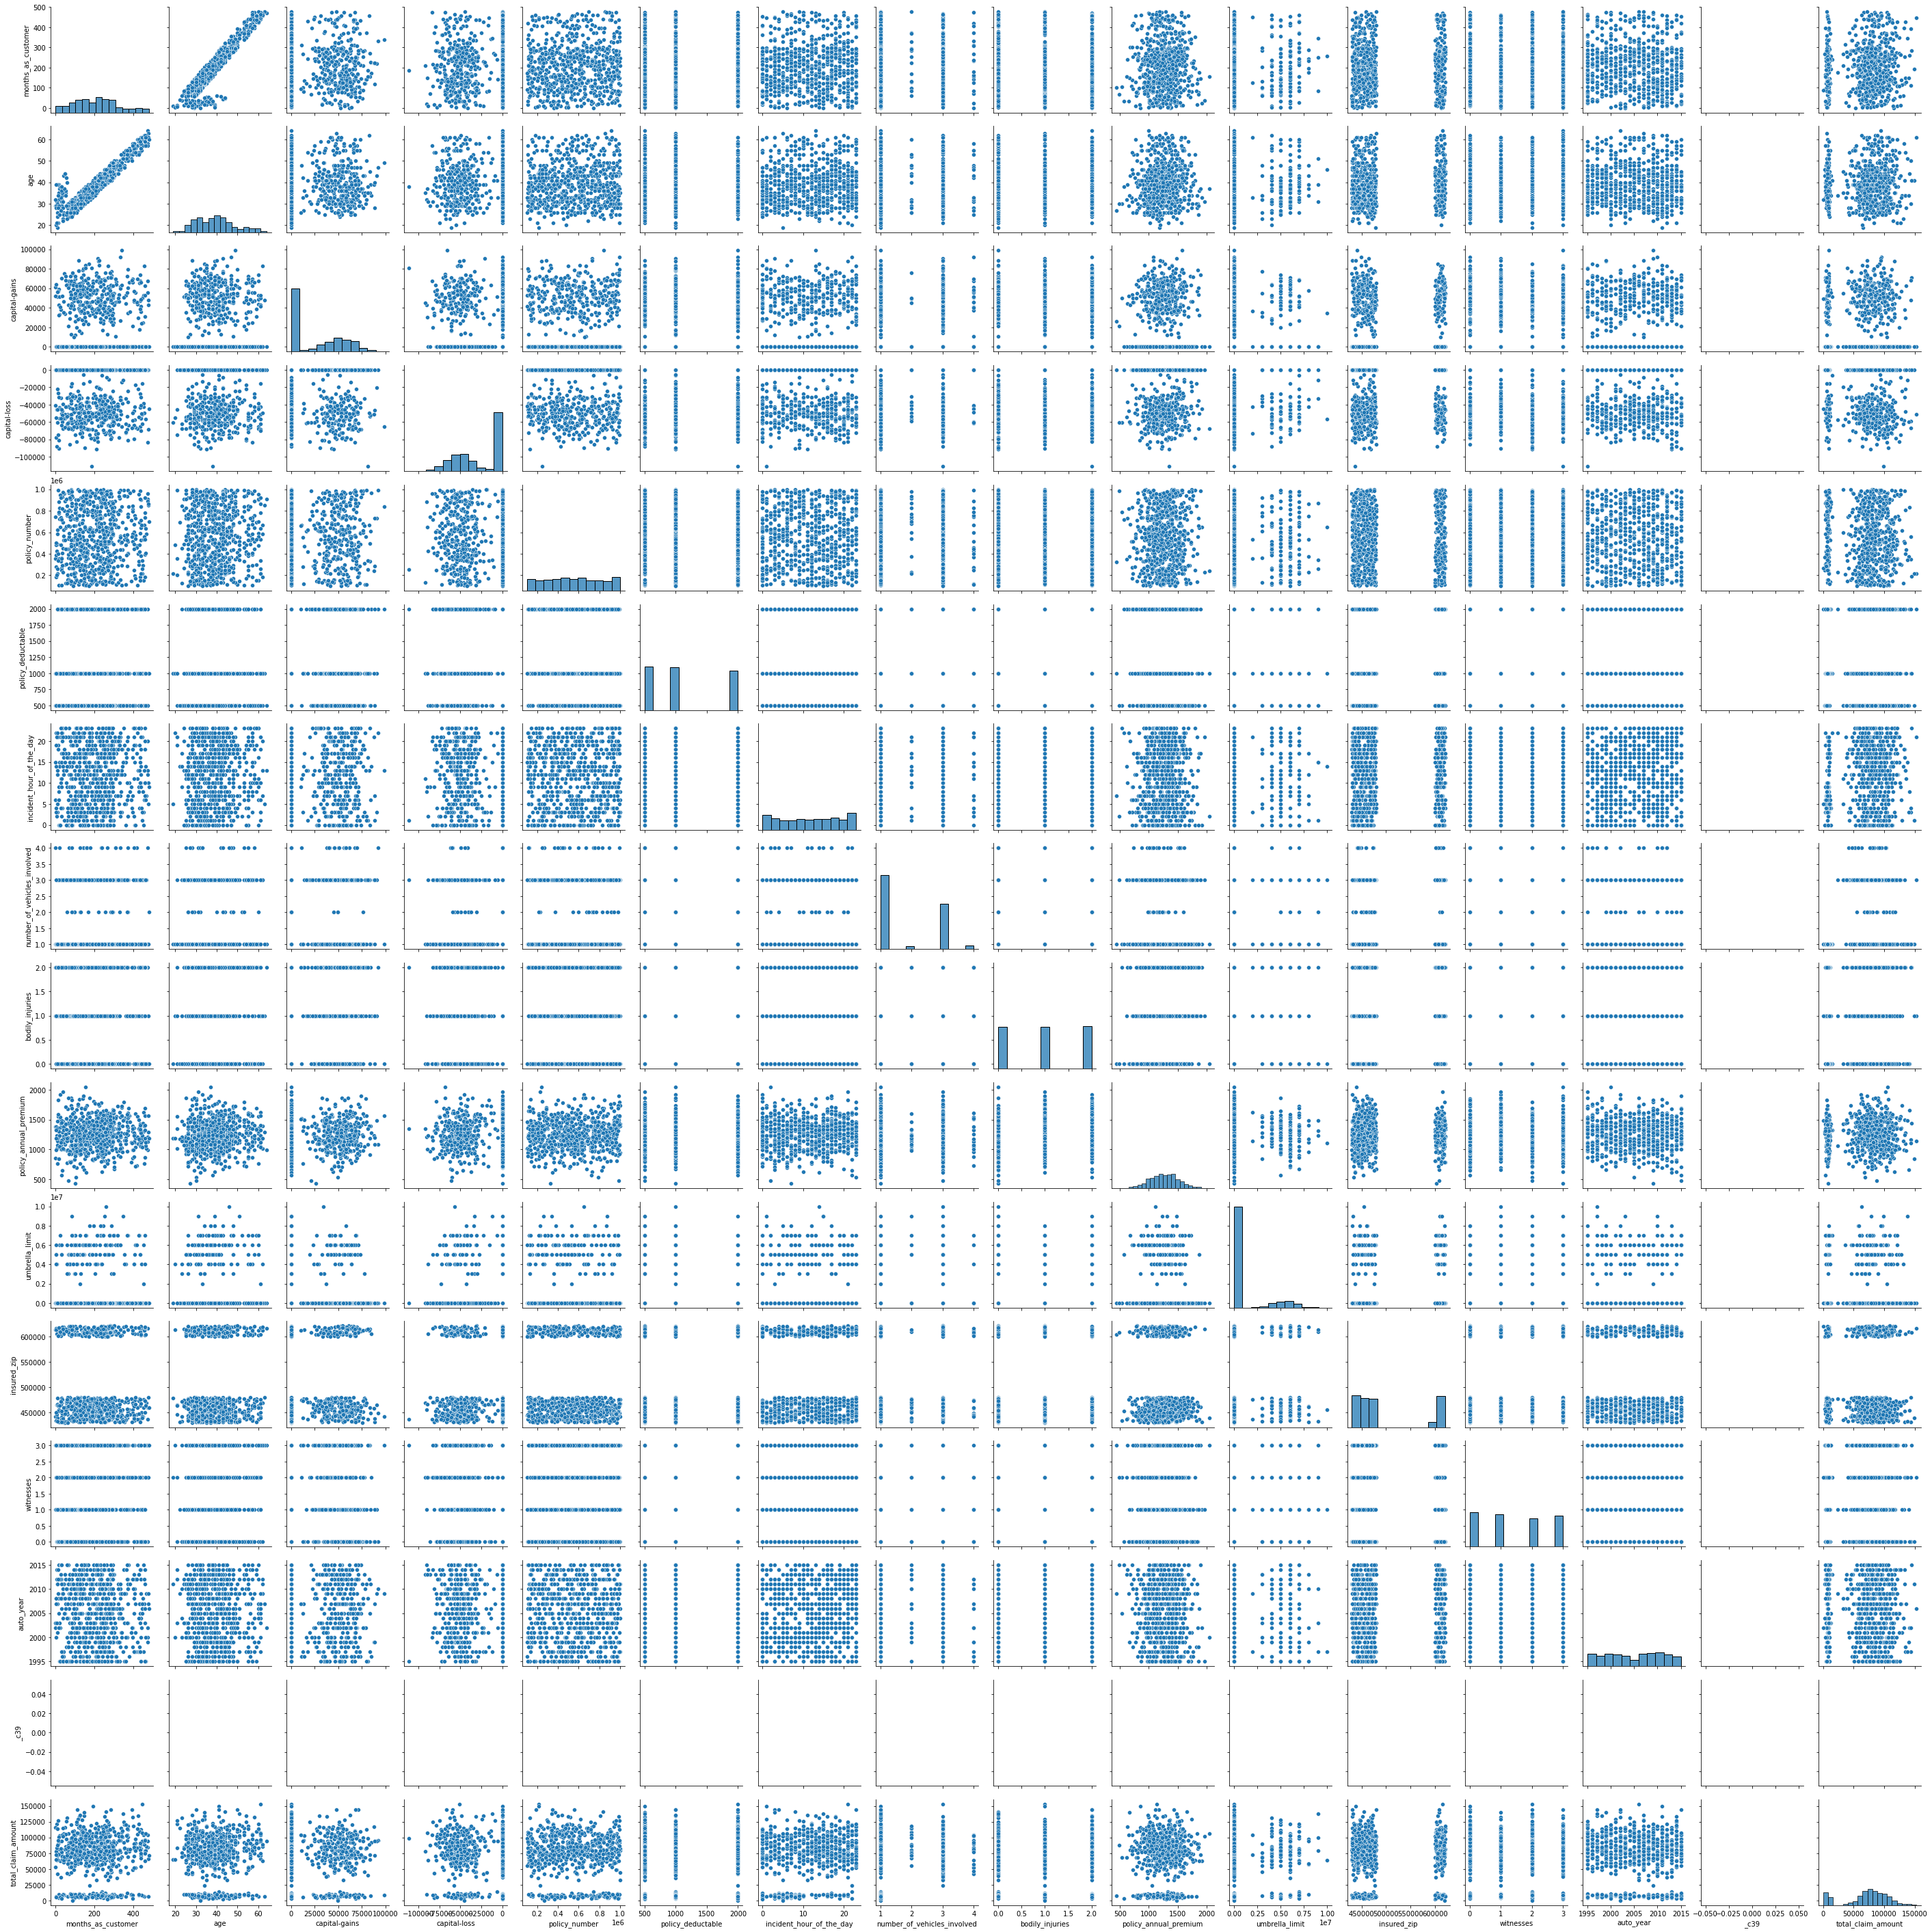

In [ ]:
import seaborn as sns
sns.pairplot(train)

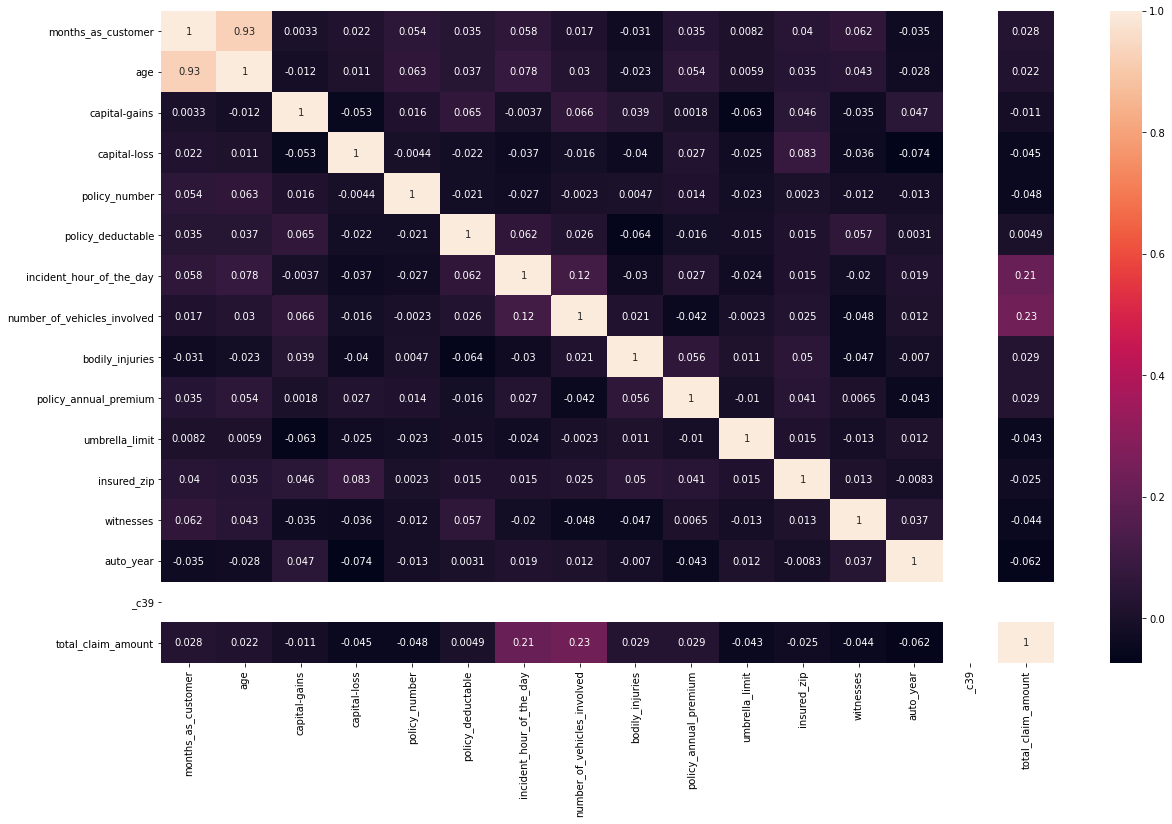

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True) #annot shows numeric in the plot

## Checking for Missing values and NaN's

In [ ]:
train.isnull().any()

Customer_ID                    False
months_as_customer             False
age                            False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
a

## We see that only column '_c39' has missing feature(s)

In [ ]:
train.head(5)

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,2013-11-11,OH,250/500,1000,6303 1st Drive,22,1,?,0,1325.44,7000000,474898,2015-02-18,Parked Car,?,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,492224,2005-12-09,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,608767,2015-02-19,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,2001-11-29,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,467227,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,355085,2012-10-09,IN,500/1000,500,6117 4th Ave,21,1,?,0,1021.90,0,464237,2015-02-05,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,2004-01-02,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,439870,2015-01-03,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


## Checking for cardinality of Feature Observations(ESPECIALLY FOR CATAEGORICAL FEATURES)

In [ ]:
train.nunique()

Customer_ID                    700
months_as_customer             346
age                             46
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  269
capital-loss                   288
policy_number                  700
policy_bind_date               671
policy_state                     3
policy_csl                       3
policy_deductable                3
incident_location              700
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
policy_annual_premium          694
umbrella_limit                  10
insured_zip                    697
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state      

In [ ]:
for i in train.columns:
  print(train[i].value_counts())

Customer_564    1
Customer_801    1
Customer_553    1
Customer_293    1
Customer_711    1
               ..
Customer_980    1
Customer_600    1
Customer_173    1
Customer_467    1
Customer_373    1
Name: Customer_ID, Length: 700, dtype: int64
222    6
230    6
245    6
295    6
290    6
      ..
273    1
263    1
256    1
251    1
0      1
Name: months_as_customer, Length: 346, dtype: int64
39    38
43    36
34    32
32    31
38    30
41    29
31    27
37    27
40    26
33    26
44    25
35    24
29    24
30    24
46    22
36    22
28    21
42    21
45    19
48    19
26    18
47    15
27    14
55    13
49    12
57    11
53     9
61     9
25     9
50     9
51     8
60     8
54     7
58     6
56     6
59     4
24     4
62     3
21     3
23     3
22     1
20     1
64     1
63     1
52     1
19     1
Name: age, dtype: int64
FEMALE    367
MALE      333
Name: insured_sex, dtype: int64
JD             117
High School    115
MD             108
Associate      104
Masters         90
College      

## Some major things to check for:
- Removal of '?'
- Remove 'incident_location' feature as all observations are unique
- Remove '_c39' because all observations are missing
- Working on date format
- Encoding Categorical variable

## Removing '?' using the pandas replace method

In [ ]:
new_train = train.replace('?', 'others')
new_test = test.replace('?', 'others')

In [ ]:
new_train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,2013-11-11,OH,250/500,1000,6303 1st Drive,22,1,others,0,1325.44,7000000,474898,2015-02-18,Parked Car,others,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,492224,2005-12-09,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,608767,2015-02-19,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,2001-11-29,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,467227,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,others,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,355085,2012-10-09,IN,500/1000,500,6117 4th Ave,21,1,others,0,1021.90,0,464237,2015-02-05,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,others,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,2004-01-02,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,439870,2015-01-03,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


## Removing 'incident_location','_c39' and 'policy_csl'

In [ ]:
new_train = new_train.drop(['incident_location','_c39','policy_csl'], axis=1)
new_test = new_test.drop(['incident_location','_c39','policy_csl'], axis=1)

In [ ]:
new_train.shape

(700, 34)

In [ ]:
new_test.shape

(300, 33)

## Working on date format

In [ ]:
from datetime import date

## For Train

In [ ]:
# create a 'year, month and day' column for 'policy_bind_date' feature
new_train['policy_bind_YEAR'] = pd.DatetimeIndex(new_train['policy_bind_date']).year
new_train['policy_bind_MONTH'] = pd.DatetimeIndex(new_train['policy_bind_date']).month
new_train['policy_bind_DAY'] = pd.DatetimeIndex(new_train['policy_bind_date']).day


In [ ]:
# create a 'year, month and day' column for 'incident_date' feature
new_train['incident_date_YEAR'] = pd.DatetimeIndex(new_train['incident_date']).year
new_train['incident_date_MONTH'] = pd.DatetimeIndex(new_train['incident_date']).month
new_train['incident_date_DAY'] = pd.DatetimeIndex(new_train['incident_date']).day

## For Test

In [ ]:
# create a 'year, month and day' column for 'policy_bind_date' feature
new_test['policy_bind_YEAR'] = pd.DatetimeIndex(new_test['policy_bind_date']).year
new_test['policy_bind_MONTH'] = pd.DatetimeIndex(new_test['policy_bind_date']).month
new_test['policy_bind_DAY'] = pd.DatetimeIndex(new_test['policy_bind_date']).day


In [ ]:
# create a 'year, month and day' column for 'incident_date' feature
new_test['incident_date_YEAR'] = pd.DatetimeIndex(new_test['incident_date']).year
new_test['incident_date_MONTH'] = pd.DatetimeIndex(new_test['incident_date']).month
new_test['incident_date_DAY'] = pd.DatetimeIndex(new_test['incident_date']).day

## There's need to drop features where extractions have been made in order to avoid data leakage and overfitting/underfitting

In [ ]:
new_train = new_train.drop(['policy_bind_date','incident_date'], axis=1)
new_test = new_test.drop(['policy_bind_date','incident_date'], axis=1)

In [ ]:
new_train.shape

(700, 38)

In [ ]:
new_test.shape

(300, 37)

## Encoding Categorical variable

In [ ]:
# Applying Label Encoder on the 'insured_sex' column as it contains only 2 unique observations

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_train['insured_sex'] = le.fit_transform(new_train['insured_sex'])
new_test['insured_sex'] = le.fit_transform(new_test['insured_sex'])
new_train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_state,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,total_claim_amount,policy_bind_YEAR,policy_bind_MONTH,policy_bind_DAY,incident_date_YEAR,incident_date_MONTH,incident_date_DAY
0,Customer_541,239,41,0,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,OH,1000,22,1,others,0,1325.44,7000000,474898,Parked Car,others,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,14386.67,2013,11,11,2015,2,18
1,Customer_440,108,31,1,Masters,protective-serv,yachting,not-in-family,0,0,492224,IN,2000,14,1,NO,0,1175.70,0,608767,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,76440.00,2005,12,9,2015,2,19
2,Customer_482,116,30,1,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,IN,500,8,3,NO,0,951.46,0,467227,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,others,Volkswagen,Passat,2004,79560.00,2001,11,29,2015,1,31
3,Customer_422,8,21,1,High School,handlers-cleaners,hiking,husband,0,0,355085,IN,500,21,1,others,0,1021.90,0,464237,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,others,Toyota,Corolla,2012,121680.00,2012,10,9,2015,2,5
4,Customer_778,161,38,1,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,IL,2000,0,3,YES,2,1133.85,0,439870,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,80640.00,2004,1,2,2015,1,3


In [ ]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    int64  
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_state                 700 non-null    object 
 12  policy_deductable            700 non-null    int64  
 13  incident_hour_of_the

In [ ]:
#Checking for object columns(categorical features) to be encoded
new_train.select_dtypes('object').columns

Index(['Customer_ID', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'policy_state',
       'property_damage', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

## Creating One-Hot encoded features

## For Train

In [ ]:
ohe1 = pd.get_dummies(new_train['insured_education_level'], prefix='Enc_')
ohe2 = pd.get_dummies(new_train['insured_occupation'], prefix='Enc_')
ohe3 = pd.get_dummies(new_train['insured_hobbies'], prefix='Enc_')
ohe4 = pd.get_dummies(new_train['insured_relationship'], prefix='Enc_')
ohe5 = pd.get_dummies(new_train['policy_state'], prefix='Enc_')
ohe6 = pd.get_dummies(new_train['property_damage'], prefix='Enc_')
ohe7 = pd.get_dummies(new_train['incident_type'], prefix='Enc_')
ohe8 = pd.get_dummies(new_train['collision_type'], prefix='Enc_')
ohe9 = pd.get_dummies(new_train['incident_severity'], prefix='Enc_')
ohe10 = pd.get_dummies(new_train['authorities_contacted'], prefix='Enc_')
ohe11= pd.get_dummies(new_train['incident_state'], prefix='Enc_')
ohe12 = pd.get_dummies(new_train['incident_city'], prefix='Enc_')
ohe13 = pd.get_dummies(new_train['police_report_available'], prefix='Enc_')
ohe14 = pd.get_dummies(new_train['auto_make'], prefix='Enc_')
ohe15 = pd.get_dummies(new_train['auto_model'], prefix='Enc_')



## For Test

In [ ]:
he1 = pd.get_dummies(new_test['insured_education_level'], prefix='Enc_')
he2 = pd.get_dummies(new_test['insured_occupation'], prefix='Enc_')
he3 = pd.get_dummies(new_test['insured_hobbies'], prefix='Enc_')
he4 = pd.get_dummies(new_test['insured_relationship'], prefix='Enc_')
he5 = pd.get_dummies(new_test['policy_state'], prefix='Enc_')
he6 = pd.get_dummies(new_test['property_damage'], prefix='Enc_')
he7 = pd.get_dummies(new_test['incident_type'], prefix='Enc_')
he8 = pd.get_dummies(new_test['collision_type'], prefix='Enc_')
he9 = pd.get_dummies(new_test['incident_severity'], prefix='Enc_')
he10 = pd.get_dummies(new_test['authorities_contacted'], prefix='Enc_')
he11= pd.get_dummies(new_test['incident_state'], prefix='Enc_')
he12 = pd.get_dummies(new_test['incident_city'], prefix='Enc_')
he13 = pd.get_dummies(new_test['police_report_available'], prefix='Enc_')
he14 = pd.get_dummies(new_test['auto_make'], prefix='Enc_')
he15 = pd.get_dummies(new_test['auto_model'], prefix='Enc_')

In [ ]:
new_train = new_train.drop(['Customer_ID','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','policy_state','property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model'], axis=1)

In [ ]:
new_test = new_test.drop(['Customer_ID','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','policy_state','property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model'], axis=1)

In [ ]:
# Concatenate OHE features to 'data_df'
new_train = pd.concat([new_train, ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,ohe13,ohe14,ohe15,], axis=1)
new_test = pd.concat([new_test, he1,he2,he3,he4,he5,he6,he7,he8,he9,he10,he11,he12,he13,he14,he15,], axis=1)

pause

In [ ]:
new_train.shape

(700, 162)

In [ ]:
new_train.head(10)

,months_as_customer,age,insured_sex,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,total_claim_amount,policy_bind_YEAR,policy_bind_MONTH,policy_bind_DAY,incident_date_YEAR,incident_date_MONTH,incident_date_DAY,Enc__Associate,Enc__College,Enc__High School,Enc__JD,Enc__MD,Enc__Masters,Enc__PhD,Enc__adm-clerical,Enc__armed-forces,Enc__craft-repair,Enc__exec-managerial,Enc__farming-fishing,Enc__handlers-cleaners,Enc__machine-op-inspct,Enc__other-service,Enc__priv-house-serv,Enc__prof-specialty,Enc__protective-serv,...,Enc__Volkswagen,Enc__3 Series,Enc__92x,Enc__93,Enc__95,Enc__A3,Enc__A5,Enc__Accord,Enc__C300,Enc__CRV,Enc__Camry,Enc__Civic,Enc__Corolla,Enc__E400,Enc__Escape,Enc__F150,Enc__Forrestor,Enc__Fusion,Enc__Grand Cherokee,Enc__Highlander,Enc__Impreza,Enc__Jetta,Enc__Legacy,Enc__M5,Enc__MDX,Enc__ML350,Enc__Malibu,Enc__Maxima,Enc__Neon,Enc__Passat,Enc__Pathfinder,Enc__RAM,Enc__RSX,Enc__Silverado,Enc__TL,Enc__Tahoe,Enc__Ultima,Enc__Wrangler,Enc__X5,Enc__X6
0,239,41,0,51400,-6300,743092,1000,22,1,0,1325.44,7000000,474898,2,2013,14386.67,2013,11,11,2015,2,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108,31,1,0,0,492224,2000,14,1,0,1175.70,0,608767,2,2006,76440.00,2005,12,9,2015,2,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,116,30,1,0,-35500,996253,500,8,3,0,951.46,0,467227,3,2004,79560.00,2001,11,29,2015,1,31,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,8,21,1,0,0,355085,500,21,1,0,1021.90,0,464237,0,2012,121680.00,2012,10,9,2015,2,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,161,38,1,60200,0,192524,2000,0,3,2,1133.85,0,439870,2,2003,80640.00,2004,1,2,2015,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,407,55,0,0,-57700,193213,1000,0,3,2,1250.08,5000000,474598,3,2010,90880.00,1996,3,11,2015,2,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,96,30,1,38900,-48700,406567,500,22,1,0,1399.27,6000000,448913,0,2004,71253.33,2001,9,25,2015,2,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,282,46,1,51100,-75100,502634,2000,2,1,2,1558.86,0,450800,2,2012,92533.33,1991,8,17,2015,2,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,146,31,0,0,0,149839,1000,0,3,1,1457.65,5000000,606219,3,2010,69840.00,1990,9,21,2015,2,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,371,54,1,34700,-81000,403776,2000,18,3,1,1317.97,0,469853,2,2010,43040.00,2012,4,27,2015,1,18,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Checking for correlation on the preprocessed data

## Seperating the Features from the Target variable

In [ ]:
X = new_train.drop('total_claim_amount',axis=1)
y = new_train['total_claim_amount']

## Training the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# First create the base model to tune
rf = RandomForestRegressor()
# Create the random grid

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
new_test['total_claim_amount'] = rf_random.predict(new_test)

In [ ]:
new_test['total_claim_amount'].shape

(300,)

In [ ]:
y.shape

(700,)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y,new_test['total_claim_amount']))

ValueError: ignored

In [ ]:
rms

In [ ]:
new_test['Customer_ID'] = test['Customer_ID']

In [ ]:
# # Write test predictions using the sample_submission format
new_test[['Customer_ID','total_claim_amount']].to_csv('Kaggle_DSN_SUBMISSION_FINAL.csv', index=False)

In [ ]:
pd.read_csv('Kaggle_DSN_SUBM5.csv').shape

In [ ]:
pd.read_csv('sample_submission.csv')